In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import datapane

In [3]:
article = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/articles_hm.csv") # articles_hm 상품
customer = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/customer_hm.csv") # customer_hm 고객
transaction = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/transactions_hm.csv") # transactions_hm 거래

일반 그룹    :  953080
vip그룹      :  95495


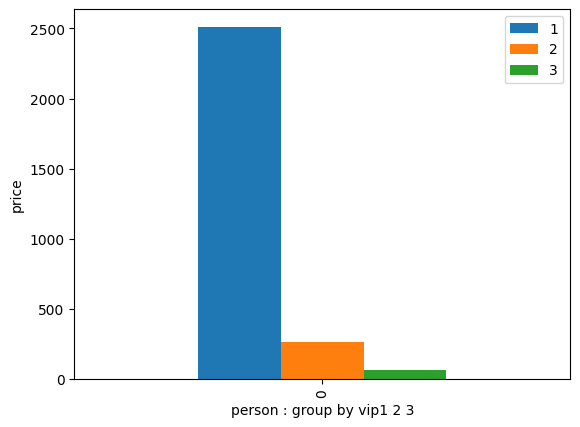

In [22]:
TnA = transaction.merge(article, on = "article_id", how = "inner")
# TnA["customer_id"].value_counts() #소비자 60, 53, 46, 45, 45 ' ' ' 
# >> 1번 구매한 사람들을 걸러내야 한다. 
# 10번 이상 구매부터 임의로 등급을 정해서 vip에 대한 컬럼 생성

cust_counts = TnA["customer_id"].value_counts()
TnA["purchase_count"] = (
    TnA.groupby("customer_id")["price"].transform("size") 
    #행 개수,customer_id가 같아도 해당 행의 count값을 purchase 컬럼 값에 대입. 
    # 따라서 행의 개수는 변하지 않는다
)
TnA_10 = TnA.loc[
    (TnA["purchase_count"] >= 10) & (TnA["purchase_count"] <= 20)
]


TnA_20 = TnA.loc[
    (TnA["purchase_count"] >= 21) & (TnA["purchase_count"] <= 30)
]
TnA_30 = TnA.loc[
    (TnA["purchase_count"] >= 31)
]

# TnA_10.count() #84588
# TnA_20.count() #8772
# TnA_30.count() #2135

sales_10 = TnA_10["price"].sum()
sales_20 = TnA_20["price"].sum()
sales_30 = TnA_30["price"].sum()

sales_df = pd.DataFrame({
    1 : [sales_10], 2 : [sales_20], 3 : [sales_30]
}).plot(kind = "bar")
plt.xlabel("person : group by vip1 2 3")
plt.ylabel("price")

# 결과값이 bool이므로 count하면 nan이 아닌 값만 출력. 
# 따라서 sum으로 카운트 해줘야 한다.
print("일반 그룹    : ", (TnA["purchase_count"] <= 9).sum())
print("vip그룹      : ", (TnA["purchase_count"] >= 10).sum())



0.050830508


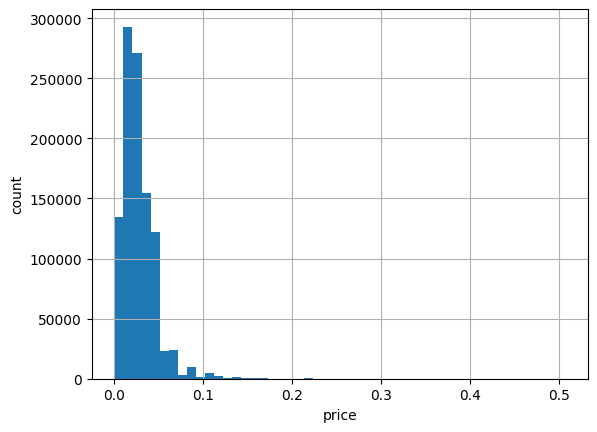

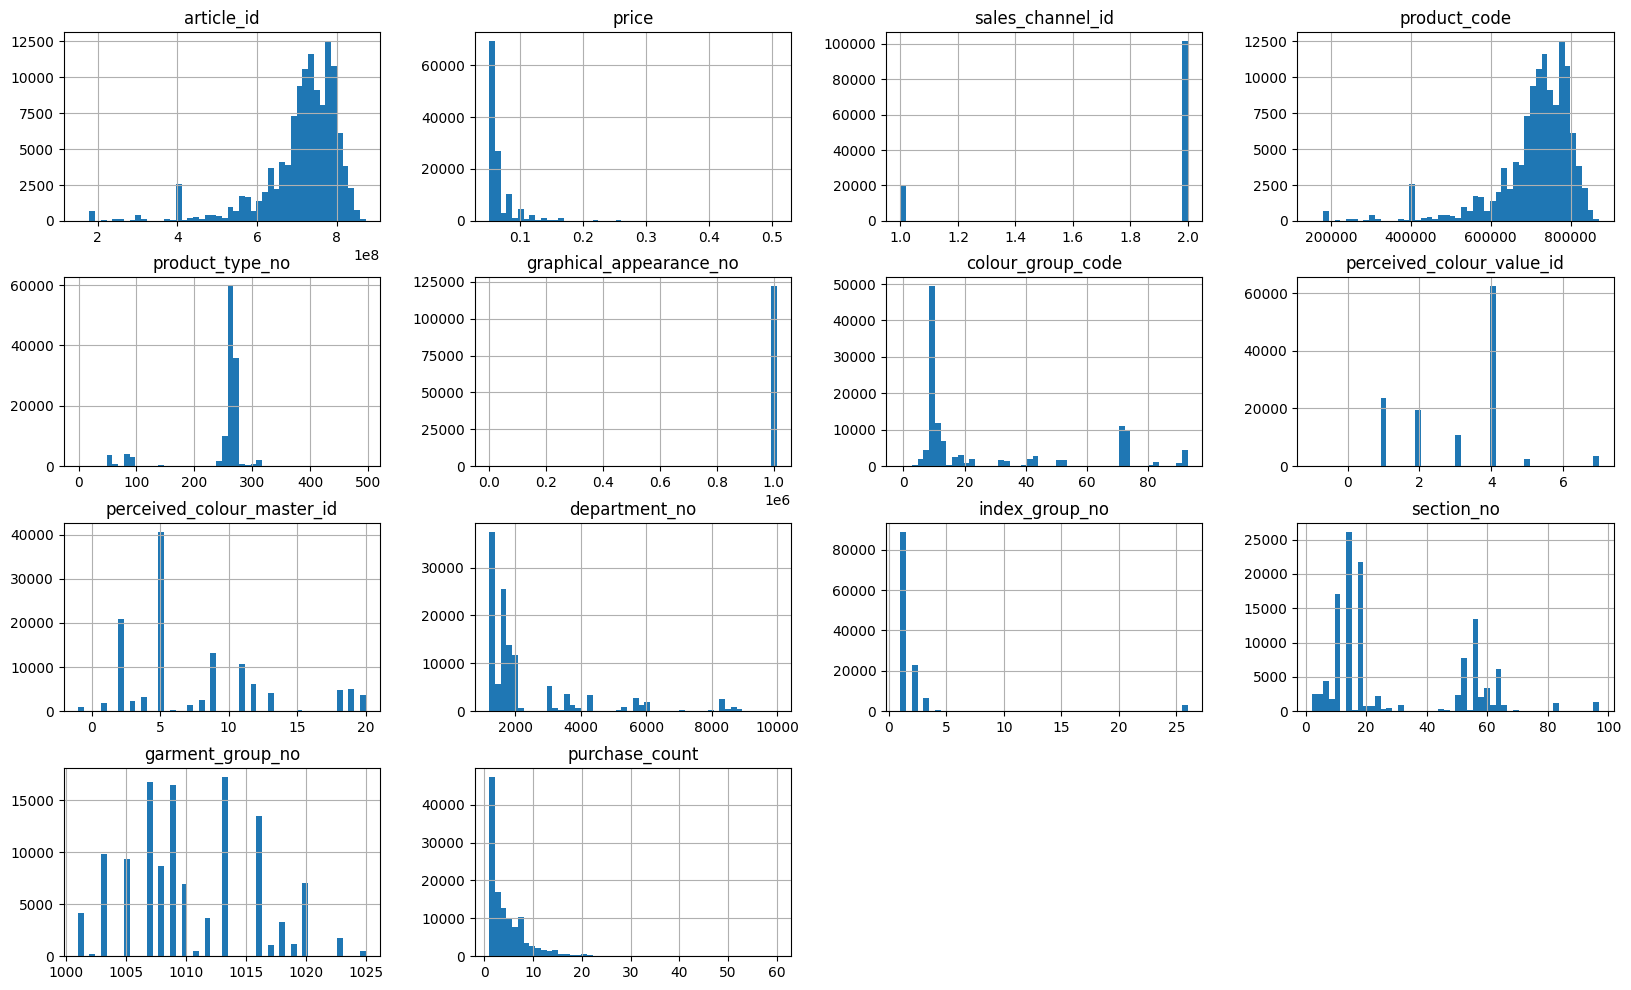

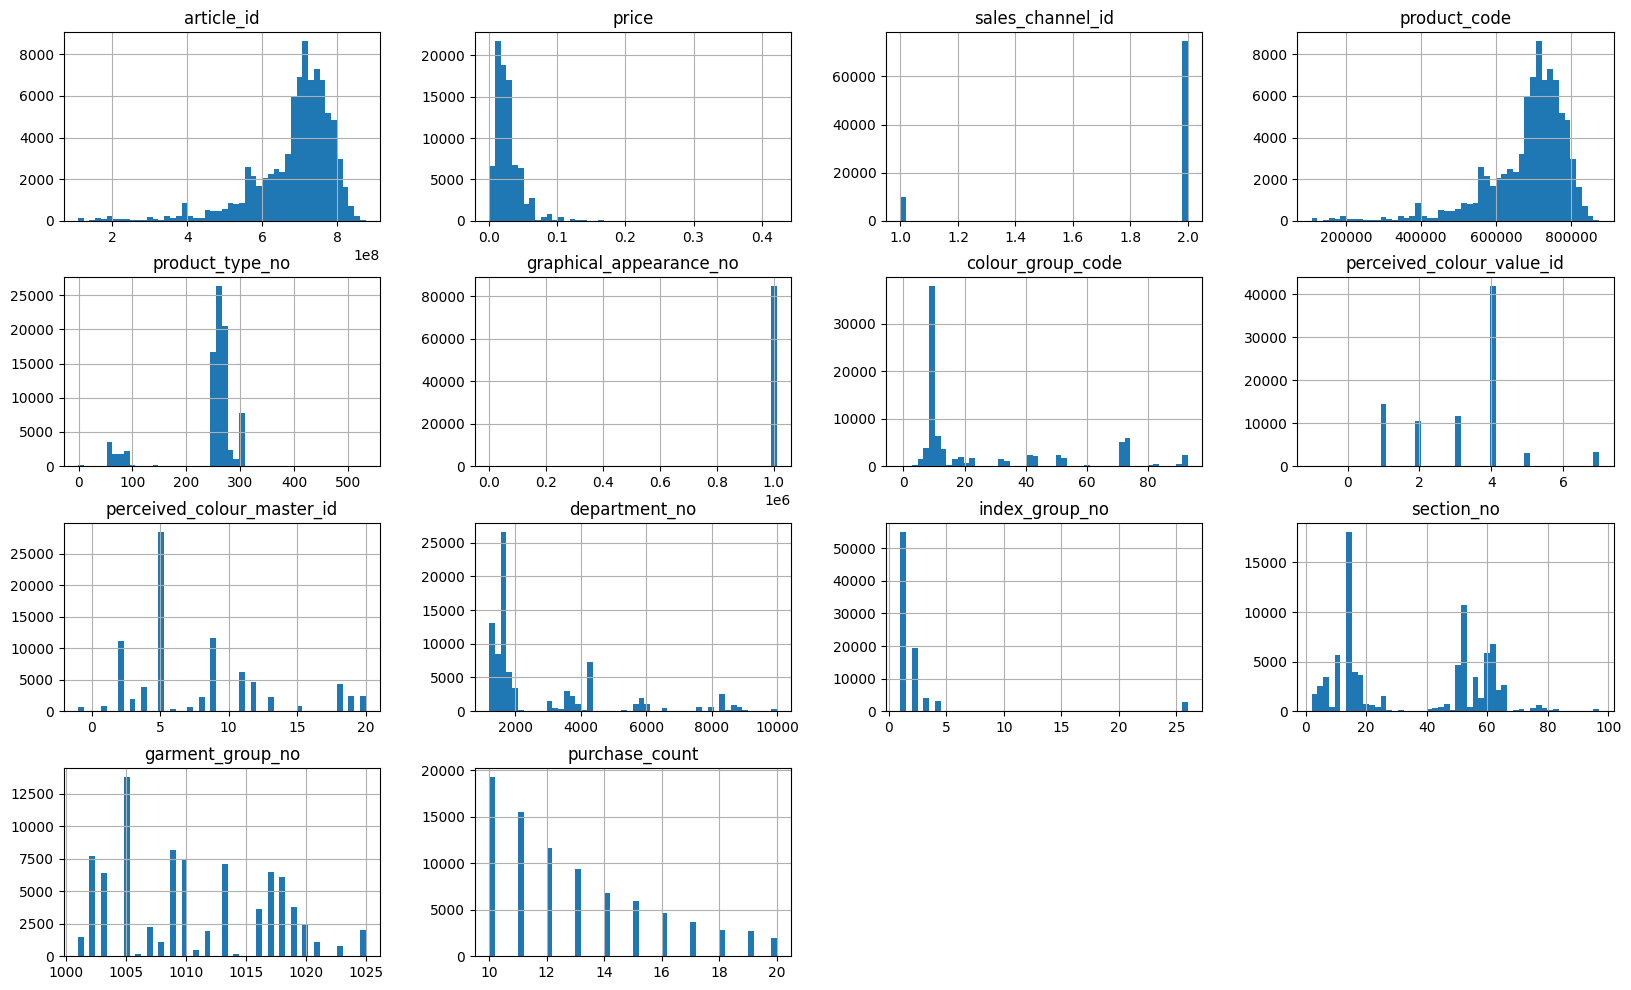

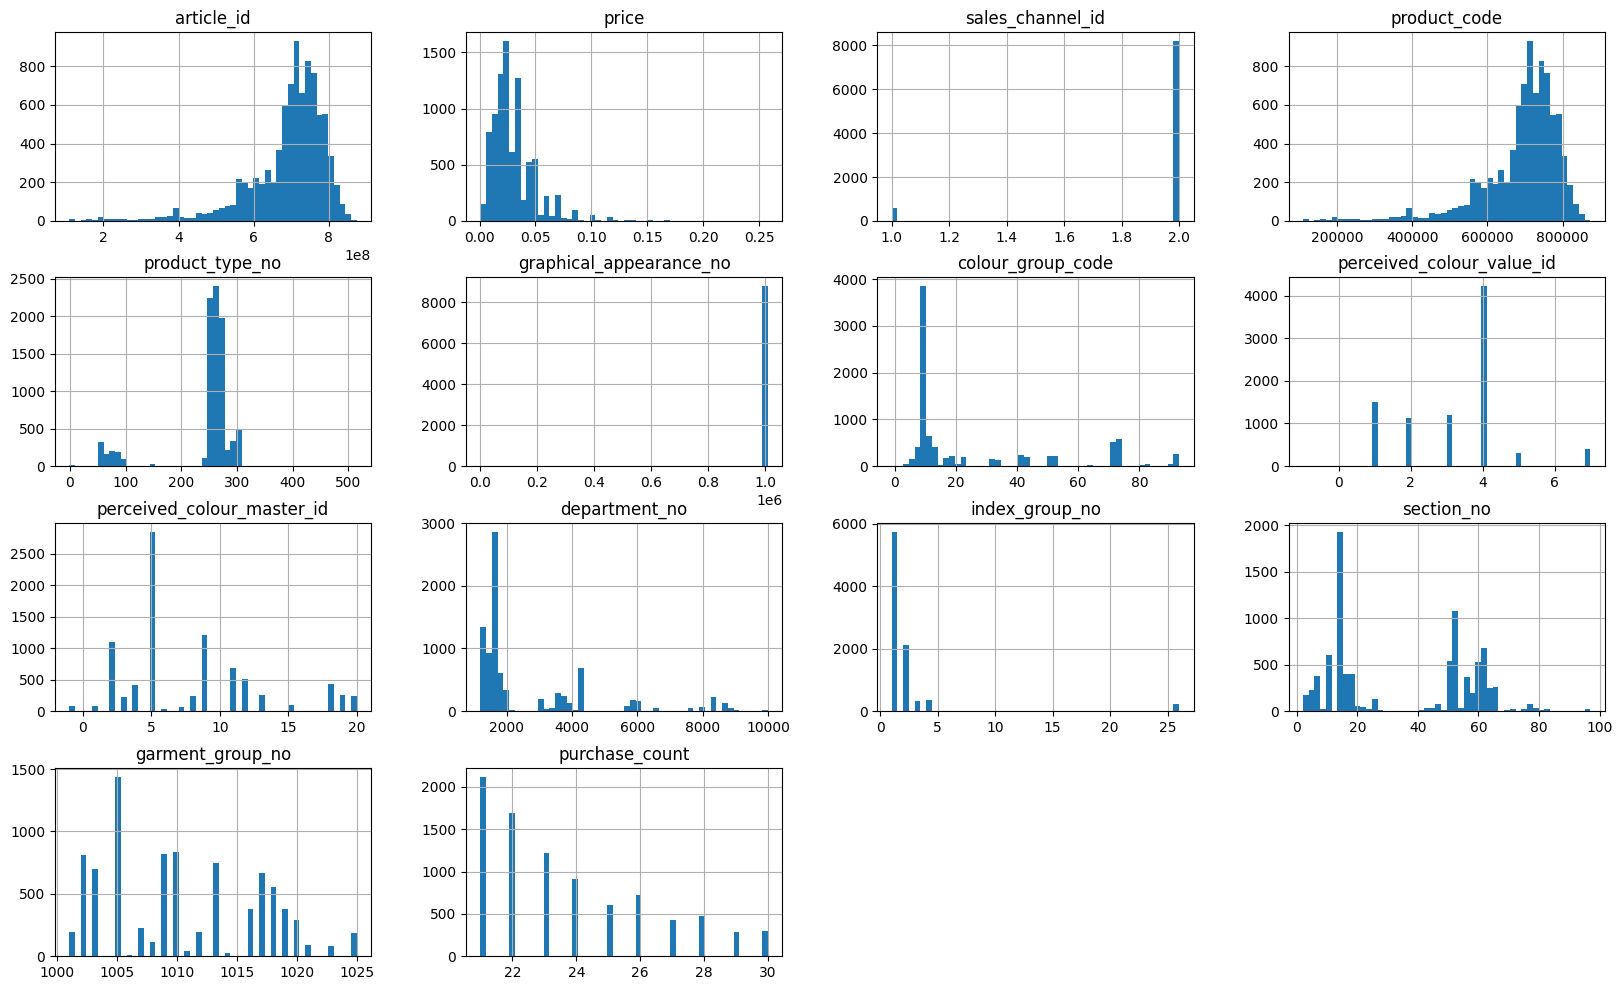

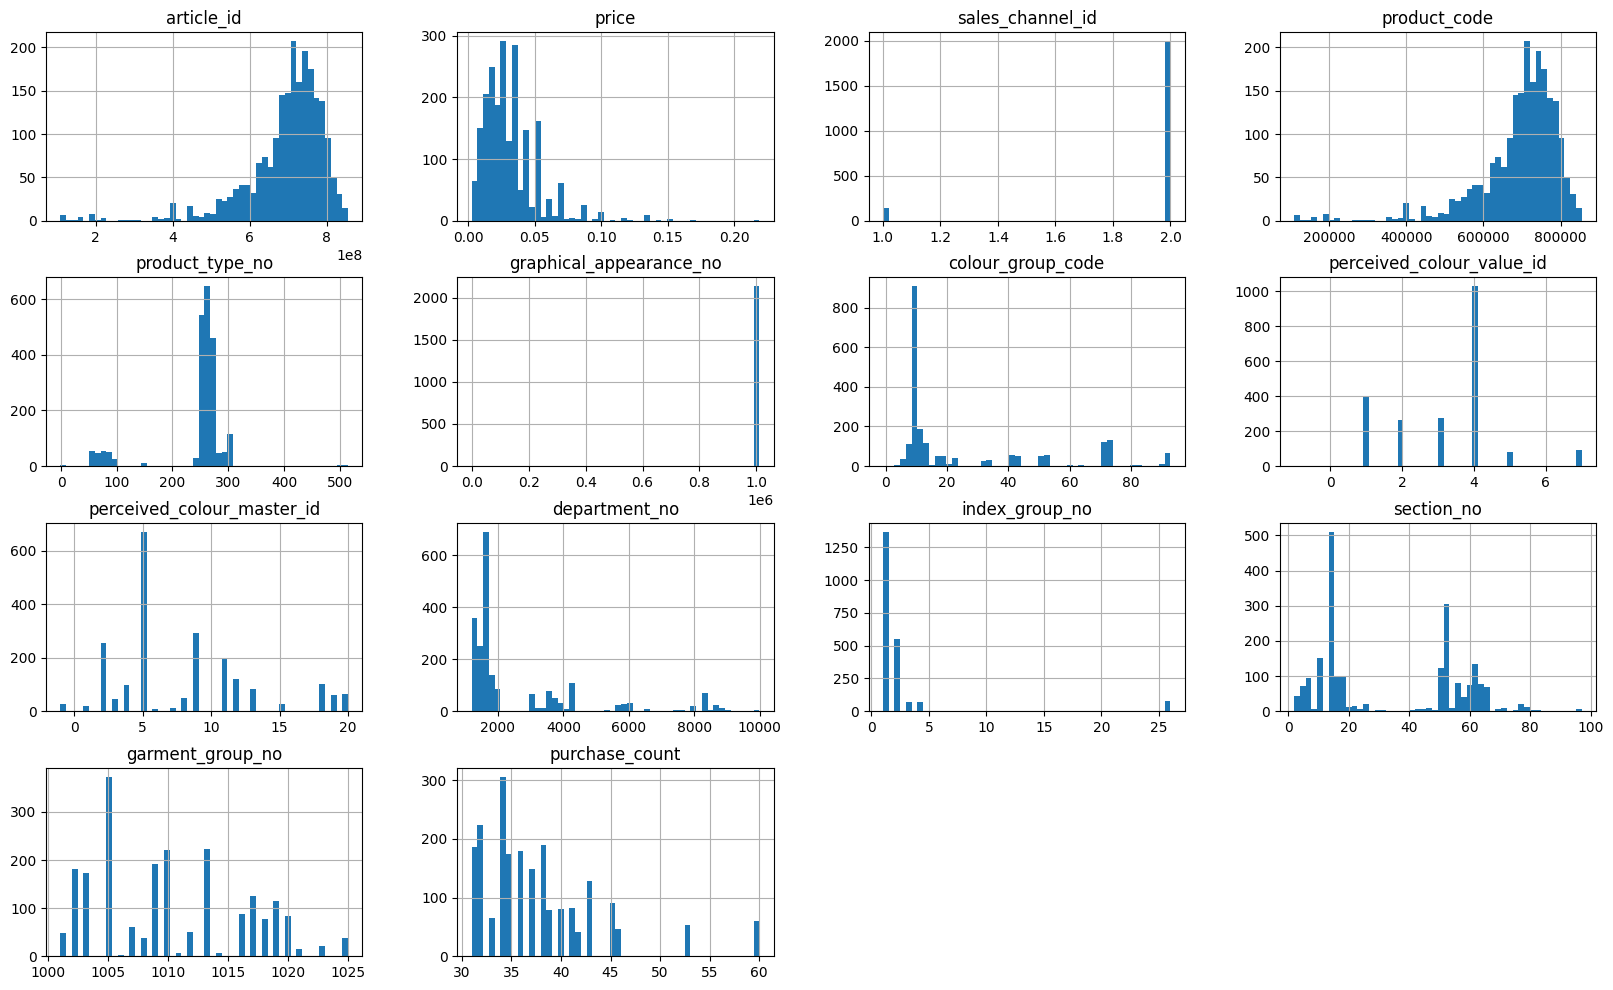

In [ ]:
TnA["price"].hist(bins = 50)
plt.xlabel("price")
plt.ylabel("count")

price_exps = TnA["price"].quantile(0.9) #상위 10%
print(price_exps)


TnA_top10p = TnA.loc[TnA["price"] >= price_exps] # 매출 상위 10%의 결제 양상 : 일반 사람들과 비슷함
axes1 = TnA_top10p.hist(
    bins = 50,
    figsize = (20, 12)
)
axes2 = TnA_10.hist( #10~20번 구매한 사람들
    bins = 50,
    figsize = (20, 12)
)
axes3 = TnA_20.hist( #21~30번 구매한 사람들
    bins = 50,
    figsize = (20, 12)
)
axes4 = TnA_30.hist( #30번 이상 구매한 사람들
    bins = 50,
    figsize = (20, 12)
)


